# 2.3 Data Visualization

This section introduces visual tools to explore and compare relationships within the `df_y_clean` dataset. For each plot type, we show both `matplotlib` and `seaborn` implementations in side-by-side subplots, using consistent data for direct comparison.

```{admonition} **Documentation**
:class: note

Although LLMs often replace **documentation** these days, the best way to make sure you remember *what* you use and *how* to use it is still to consult the documentation:
- Matplotlib [Cheat Sheets](https://matplotlib.org/cheatsheets/)
- Matplotlib [Documentation](https://matplotlib.org/stable/index.html)
- Seaborn [Cheat Sheets](https://media.datacamp.com/legacy/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf)
- Seaborn [Documentation](https://seaborn.pydata.org/tutorial.html)
```

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid")

df_y = pd.read_csv("https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv",
                   usecols=[1,2,3,4,5,6,7],
                   na_values="NaN",
                   index_col=0)
df_y_clean = df_y.dropna()

## 2.3.1 Histogram
**Purpose**: Visualize the frequency distribution of IQ scores.

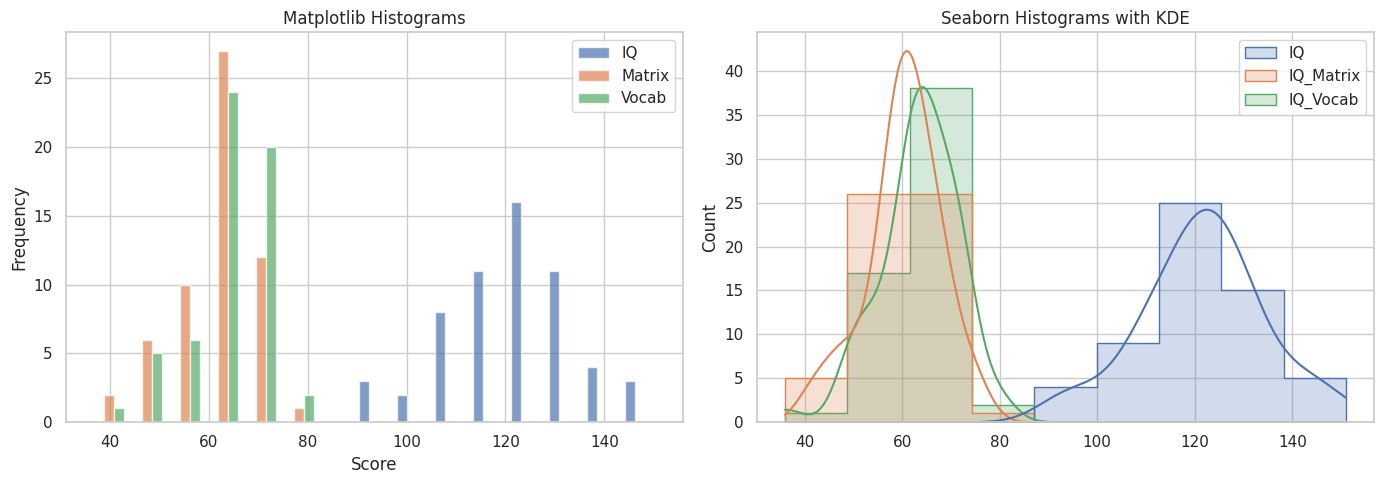

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].hist(df_y_clean[["IQ", "IQ_Matrix", "IQ_Vocab"]], bins=15, label=["IQ", "Matrix", "Vocab"], alpha=0.7)
ax[0].set_title("Matplotlib Histograms")
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Frequency")
ax[0].legend()

sns.histplot(data=df_y_clean[["IQ", "IQ_Matrix", "IQ_Vocab"]], kde=True, element="step", ax=ax[1])
ax[1].set_title("Seaborn Histograms with KDE")

plt.tight_layout()
plt.show()

## 2.3.2 Box Plot
**Purpose**: Show distribution, spread, and outliers in IQ scores, grouped by gender.

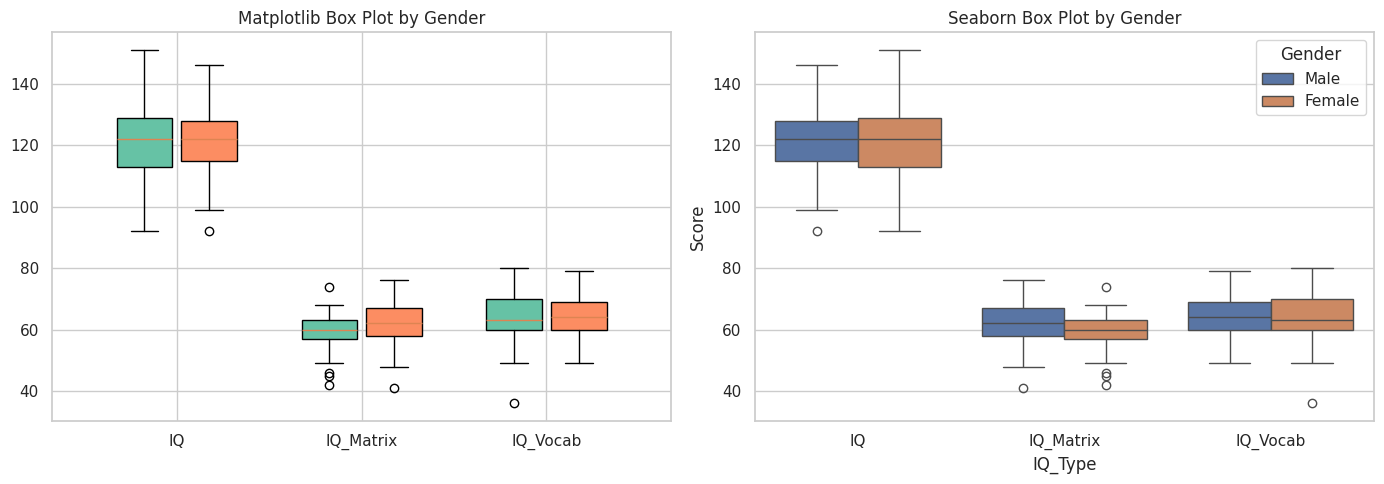

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df_y_melt = df_y_clean.melt(id_vars="Gender", value_vars=["IQ", "IQ_Matrix", "IQ_Vocab"],
                            var_name="IQ_Type", value_name="Score")

# Matplotlib approximation via grouped boxplot
groups = df_y_melt.groupby(["Gender", "IQ_Type"])["Score"].apply(list).unstack()
positions = np.arange(len(groups.columns))
width = 0.35

for i, gender in enumerate(groups.index):
    bp = ax[0].boxplot(groups.loc[gender].values,
                       positions=positions + i * width,
                       widths=0.3,
                       patch_artist=True,
                       boxprops=dict(facecolor=["#66c2a5", "#fc8d62", "#8da0cb"][i % 3]))
ax[0].set_xticks(positions + width / 2)
ax[0].set_xticklabels(groups.columns)
ax[0].set_title("Matplotlib Box Plot by Gender")

# Seaborn
sns.boxplot(x="IQ_Type", y="Score", hue="Gender", data=df_y_melt, ax=ax[1])
ax[1].set_title("Seaborn Box Plot by Gender")

plt.tight_layout()
plt.show()

## 2.3.3 Scatter Plot
**Purpose**: Show the relationship between Age and each IQ metric, colored by Gender.

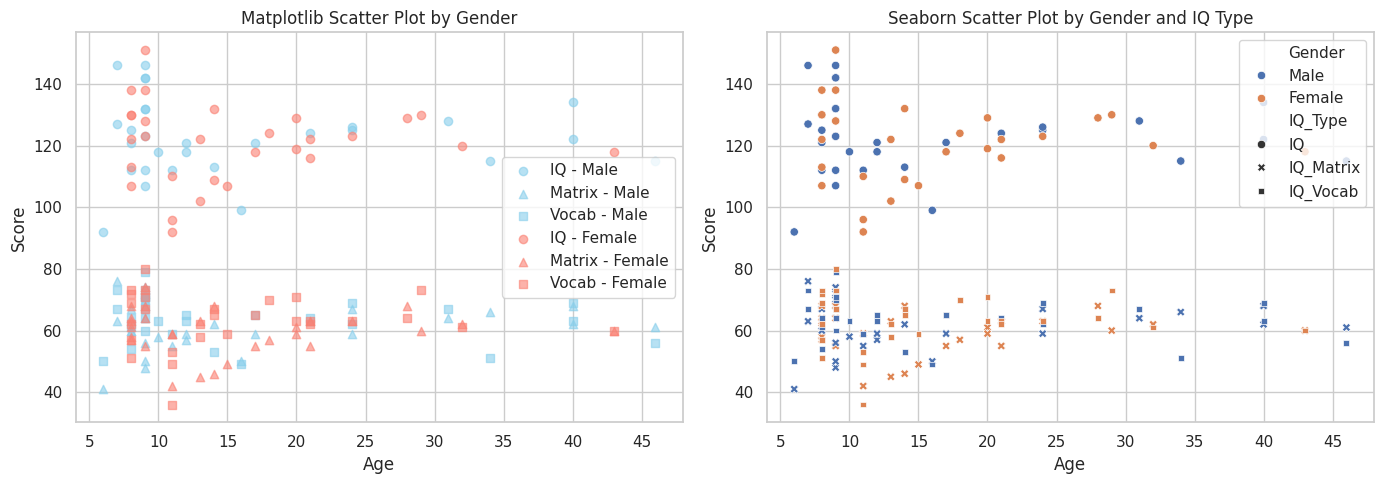

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

colors = {'Male': 'skyblue', 'Female': 'salmon'}
for gender, color in colors.items():
    subset = df_y_clean[df_y_clean["Gender"] == gender]
    ax[0].scatter(subset["Age"], subset["IQ"], label=f"IQ - {gender}", alpha=0.6, color=color)
    ax[0].scatter(subset["Age"], subset["IQ_Matrix"], label=f"Matrix - {gender}", marker='^', alpha=0.6, color=color)
    ax[0].scatter(subset["Age"], subset["IQ_Vocab"], label=f"Vocab - {gender}", marker='s', alpha=0.6, color=color)
ax[0].set_title("Matplotlib Scatter Plot by Gender")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Score")
ax[0].legend()

melted = df_y_clean.melt(id_vars=["Age", "Gender"],
                         value_vars=["IQ", "IQ_Matrix", "IQ_Vocab"],
                         var_name="IQ_Type", value_name="Score")
sns.scatterplot(data=melted, x="Age", y="Score", hue="Gender", style="IQ_Type", ax=ax[1])
ax[1].set_title("Seaborn Scatter Plot by Gender and IQ Type")

plt.tight_layout()
plt.show()

## 2.3.4 Line Plot
**Purpose**: Visualize trends in IQ scores across age.

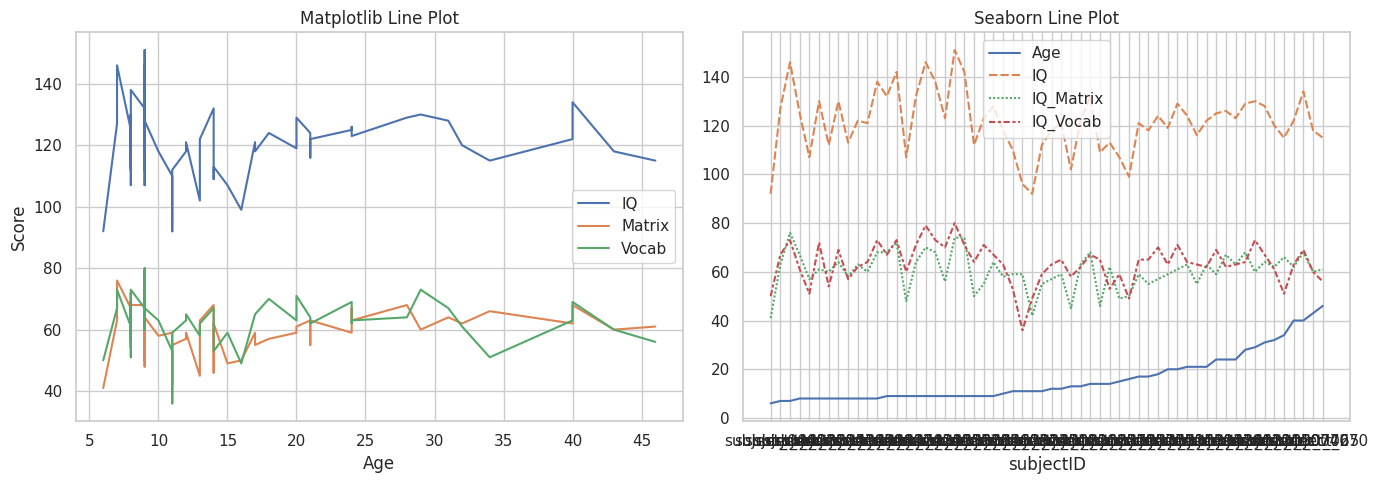

In [5]:
df_y_sorted = df_y_clean.sort_values("Age")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(df_y_sorted["Age"], df_y_sorted["IQ"], label="IQ")
ax[0].plot(df_y_sorted["Age"], df_y_sorted["IQ_Matrix"], label="Matrix")
ax[0].plot(df_y_sorted["Age"], df_y_sorted["IQ_Vocab"], label="Vocab")
ax[0].set_title("Matplotlib Line Plot")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Score")
ax[0].legend()

sns.lineplot(data=df_y_sorted[["Age", "IQ", "IQ_Matrix", "IQ_Vocab"]], ax=ax[1])
ax[1].set_title("Seaborn Line Plot")

plt.tight_layout()
plt.show()

## 2.3.5 Bar Plot
**Purpose**: Show frequency of different handedness categories.

/tmp/ipykernel_2201/676046580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Handedness", data=df_y_clean, ax=ax[1], palette="pastel")


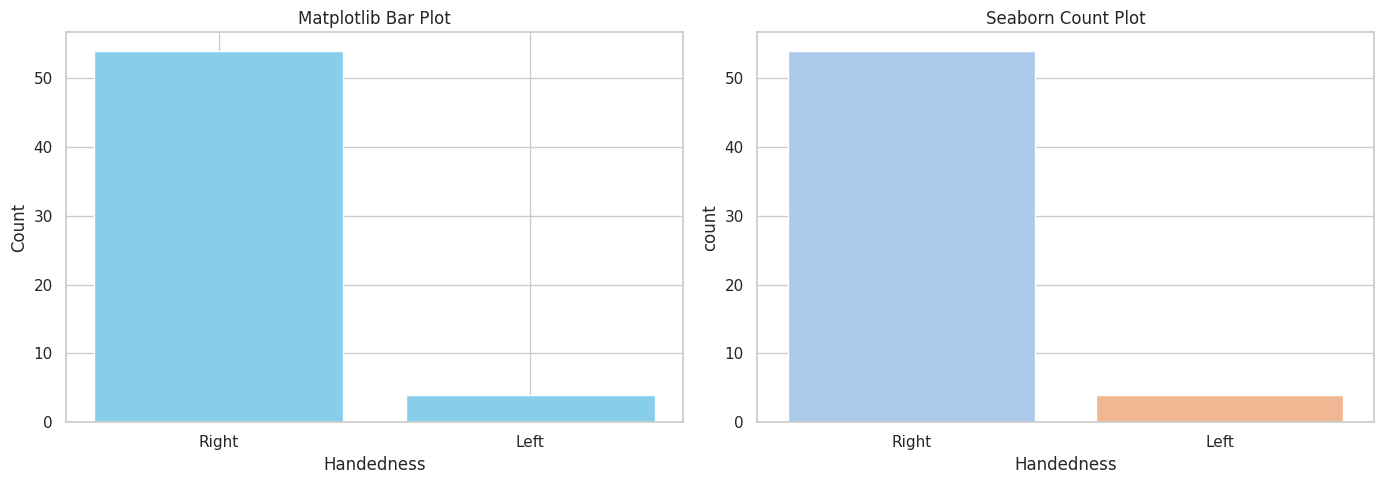

In [6]:
counts = df_y_clean["Handedness"].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(counts.index.astype(str), counts.values, color="skyblue")
ax[0].set_title("Matplotlib Bar Plot")
ax[0].set_xlabel("Handedness")
ax[0].set_ylabel("Count")

sns.countplot(x="Handedness", data=df_y_clean, ax=ax[1], palette="pastel")
ax[1].set_title("Seaborn Count Plot")

plt.tight_layout()
plt.show()

## 2.3.6 Density Plot
**Purpose**: Compare smoothed distributions of IQ types.

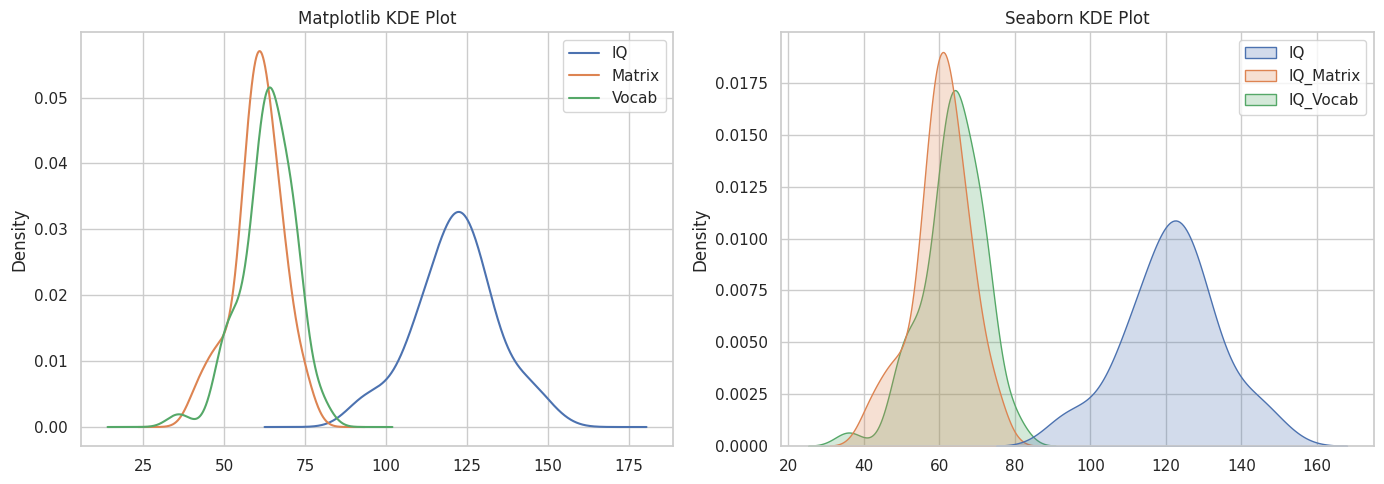

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df_y_clean["IQ"].plot.kde(ax=ax[0], label="IQ")
df_y_clean["IQ_Matrix"].plot.kde(ax=ax[0], label="Matrix")
df_y_clean["IQ_Vocab"].plot.kde(ax=ax[0], label="Vocab")
ax[0].set_title("Matplotlib KDE Plot")
ax[0].legend()

sns.kdeplot(data=df_y_clean[["IQ", "IQ_Matrix", "IQ_Vocab"]], fill=True, ax=ax[1])
ax[1].set_title("Seaborn KDE Plot")

plt.tight_layout()
plt.show()

## 2.3.7 Correlation Heatmap
**Purpose**: Examine pairwise relationships between numerical variables.

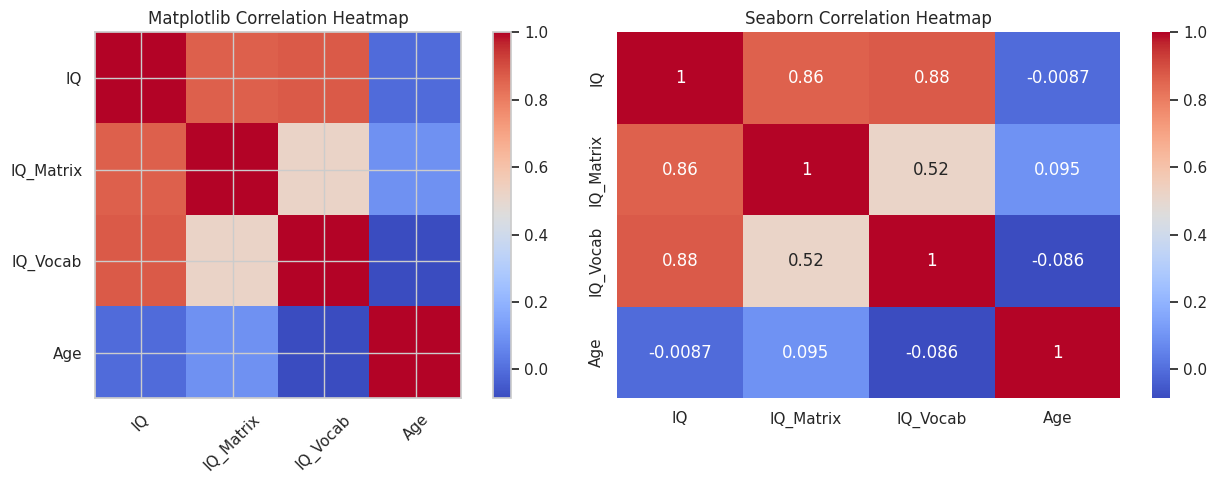

In [8]:
corr = df_y_clean[["IQ", "IQ_Matrix", "IQ_Vocab", "Age"]].corr()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

im = ax[0].imshow(corr, cmap='coolwarm')
fig.colorbar(im, ax=ax[0])
ax[0].set_title("Matplotlib Correlation Heatmap")
ax[0].set_xticks(np.arange(len(corr.columns)))
ax[0].set_yticks(np.arange(len(corr.columns)))
ax[0].set_xticklabels(corr.columns, rotation=45)
ax[0].set_yticklabels(corr.columns)

sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title("Seaborn Correlation Heatmap")

plt.tight_layout()
plt.show()

````{tab-set} 
```{tab-item} Matplotlib
~~~{admonition} Common `matplotlib` Plotting Parameters
:class: tip, dropdown

These parameters help you customize plots when using functions like `ax.plot()`, `ax.scatter()`, `ax.boxplot()`, or `ax.bar()`:

- `color=`     – Set the color of lines, markers, or bars (e.g. `"red"`, `"skyblue"`).
- `linestyle=` – Define the line style: `"-"` (solid), `"--"` (dashed), `":"` (dotted).
- `linewidth=` – Thickness of the line.
- `marker=`    – Shape of data points in plots: `"o"` (circle), `"s"` (square), `"^"` (triangle).
- `alpha=`     – Transparency level (0 to 1).
- `label=`     – Text label to show in the legend.
- `widths=`    – Width of boxes in `boxplot()`.
- `positions=` – Specific x-axis positions for elements (e.g. for boxplots or bars).
- `edgecolor=` – Color of outline/border.
- `facecolor=` – Fill color for shapes like boxes or bars.
- `hatch=`     – Pattern inside bars/boxes (e.g. `'/'`, `'\\'`, `'-'`).
~~~
```

```{tab-item} Seaborn
~~~{admonition} Common `seaborn` Plotting Parameters
:class: tip, dropdown

These parameters can be used with functions like `sns.boxplot()`, `sns.scatterplot()`, or `sns.histplot()`:

- `palette=` – Color palette for categories (e.g. `"pastel"`, `"Set2"`, or a list of colors).
- `hue=` – Grouping variable to color by category.
- `style=` – Marker or line style grouped by category (for scatter/line plots).
- `size=` – Variable that determines marker size.
- `alpha=` – Transparency of elements.
- `linewidth=` – Width of lines or box borders.
- `fliersize=` – Size of outlier markers in boxplots.
- `dodge=` – Separate overlapping elements (e.g. `dodge=True` in grouped boxplots).
- `width=` – Width of boxes/bars.
- `fill=` – Whether to fill areas like density plots (`True` or `False`).
~~~
```
````